## 1. Import Library and Dataset

In [0]:
import nltk # Imports the library
# nltk.download_shell() #Download the necessary datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_training_all_random.csv to sentiment_training_all_random.csv


In [4]:
# url = 'https://github.com/frhamadiansyah/FinalProject/raw/master/sentiment_analysis_ID_clean.csv'
df = pd.read_csv('sentiment_training_all_random.csv', sep = ';', header=None)
df.columns = ['Tweet','sentimen']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 2 columns):
Tweet       1506 non-null object
sentimen    1506 non-null int64
dtypes: int64(1), object(1)
memory usage: 23.7+ KB


In [5]:
df.head()

,Tweet,sentimen
0,"rt @napqilla: no 1, 3 ambisinya menguasai raky...",1
1,rt @pandji: nah gue pikir sentimen petahana ok...,1
2,rt @pandji: urutan pertama best moment #debat2...,1
3,rt @pandji: ini artikel yg menjelaskan ternyat...,1
4,rt @mrtampi: agus makin santai.\nahok makin sa...,0


In [6]:
df.sentimen.value_counts()

1    757
0    749
Name: sentimen, dtype: int64

In [7]:
df[df['sentimen'] == 1]['Tweet'].sample(10).values

array(['alasan anies sering turun ke masyarakat meski belum masa kampanye https:\\/\\/t.co\\/nu6gn7zqop (via tribunpku)',
       'ini alasan ahok temui sophia latjuba tanpa djarot: jakarta (pos kota) \\u2013 menjelang masa kampanye pilkada dki 2... https:\\/\\/t.co\\/sewefop4rf',
       'ketua mui minta ahok perjelas permintaan maafnya: ketua umum majelis ulama indonesia (mui) pusat, maruf amin,... https:\\/\\/t.co\\/znewpwu7rw',
       'rt @politikbersihh: @sbyudhoyono sibeye semoga di tahun ayam rooster ini pasangan nomer 2 menang pilkada! hore #ahokdjarot\\u2026 ',
       'benerr bgt.. dan tidak mengajak penonton ikut mikir \\ud83d\\ude06 https:\\/\\/t.co\\/jqnzamb7r3',
       'ketua mui minta ahok perjelas permintaan maafnya https:\\/\\/t.co\\/nnqsv7jw6g',
       'rt @pandji: urutan pertama best moment #debat2pilkadadki : pak basuki misahin bu sylvie &amp',
       'rt @gerilyapolitik: selamat pagi, mari kita berpikir sejenak #masih #debat2pilkadadki \\ud83e\\udd14\\ud83e\\udd14\\ud

In [0]:
df[df['sentimen'] == 0]['Tweet'].sample(10).values

array(['rt @teddygusnaidi: 16. anies baswedan hanya mengurus satu urusan saja berantakan, bagaimana dia bisa berfantasi menyelesaikan banyak urusan\\u2026',
       'rt @alvano91: ahok di sosmed jg di bully habis2, tp ahok gak mau main blokir, kalo anies di sindir dikit aja sdh main blokir, dasar pemimpi\\u2026',
       'masih tetep dukung ahok sih buat jadi gub selanjutnya.',
       'asiknya habis bela ahok, dapat amplop https:\\/\\/t.co\\/mzc32spmat',
       'rt @teddygusnaidi: 16. anies baswedan hanya mengurus satu urusan saja berantakan, bagaimana dia bisa berfantasi menyelesaikan banyak urusan\\u2026',
       '#debat2pilkadadki anehh bin ajaib ada paslon memaparkan data transjakarta naik hanya 6% padahal aslinya hingga 20% (data tidak jelas)',
       'video mahasiswa lhokseumawe demo ahok https:\\/\\/t.co\\/ygkmduddpc',
       'rt @handininanda: eh ini nyinyir dulu ya.. itu paslon 3 punya program ga sih?? daritadi kerjaannya korek2 aib orang doang. #gemetz #debat2p\\u2026',
       

## 2. Import Clean-up Dataset

In [0]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

# kamus_slang = pd.read_csv('kamus_slang.csv')


# kamus_slang.head()

In [0]:
kamus_alay = pd.read_csv('kamus_slang.csv', index_col = 0)


kamus_alay.head()

,Alay,KBBI
0,ajh,saja
1,ajj,saja
2,akoh,aku
3,amaca,ah masa
4,amuh,kamu


In [0]:
kamus_alay['KBBI']

0                saja
1                saja
2                 aku
3             ah masa
4                kamu
            ...      
4471            cepat
4472    enggak taunya
4473       enggak tau
4474          fan-fan
4475     enggak harus
Name: KBBI, Length: 4476, dtype: object

In [0]:
kamus = {}
# kamus_alay[kamus_alay['Alay'] == 'gw']
for index, row in kamus_alay.iterrows():
    kamus[row['Alay']] = row['KBBI']

In [0]:
kamus_alay.to_csv('kamus_slang.csv')

## 3. Clean-up Dataset

### 3a. Clean up uppercase and hyperlink

In [0]:
def clean_link(text):
    #lowercase all
    text = text.lower()
    #hapus RT
    text=re.sub('^rt @[^\s]+','',text)
    #text = re.sub(',','',text)
    text=re.sub(r'http\S+','',text)
    #hapus \n
    text=re.sub('\n',' ',text)
    #hapus hashtag
    text = re.sub(r'#\S+','',text)

    return text


In [0]:
df['clean_link'] = df['Tweet'].apply(clean_link)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

### 3b. Hapus tanda baca dan angka

In [0]:
pip install pysastrawi


In [0]:
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def hapus_punc(text):
    hapus = string.punctuation + '0123456789'
    text = [char for char in text if char not in hapus]
    return ''.join(text)
    

In [0]:
df['hapus_punc'] = df['clean_link'].apply(hapus_punc)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

### 3c. Substitusi slang words

In [0]:
def hapus_hurufdouble(s): 
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

def substitute_slang(text):
    text = text.split()
    text = [hapus_hurufdouble(word) for word in text]
    global kamus
    for i in range(len(text)):
        if text[i] in kamus.keys():
            text[i] = kamus[text[i]]
    
    return ' '.join(text)


In [0]:
df['substitute_slang'] = df['hapus_punc'].apply(substitute_slang)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

### 3d. Stemming

In [0]:
def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    return stemmer.stem(text)

In [0]:
df['stemming'] = df['substitute_slang'].apply(stemming)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

### 3e. Buang stop words

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def eliminate_stop(text):
    return ' '.join([word for word in text.split() if word not in stopwords.words('indonesian')])

In [0]:
df['eliminate_stop_with_'] = df['stemming'].apply(eliminate_stop)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

### 3f. Buang Noise (kata2 berulang)

In [0]:
# list_noise = pd.Series(word_tally['eliminate_stop'])
# list_noise = list(list_noise[list_noise < threshold].index)
list_noise = ['ahok', 'agus', 'anies', 'dki', 'pilkada','jakarta','sylvie','no', 'nomor']

In [0]:
def eliminate_noise(text):
    global list_noise
    text = text.split()
    text = [word for word in text if word not in list_noise]
    return ' '.join(text)

In [0]:
df['eliminate_noise'] = df['eliminate_stop'].dropna().apply(eliminate_noise)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 8 columns):
Tweet               1506 non-null object
sentimen            1506 non-null int64
clean_link          1506 non-null object
hapus_punc          1506 non-null object
substitute_slang    1506 non-null object
stemming            1506 non-null object
eliminate_stop      1506 non-null object
eliminate_noise     1506 non-null object
dtypes: int64(1), object(7)
memory usage: 94.2+ KB


### 3g. Buang Noise (threshold 20)

In [0]:
# determine threshold
threshold = 10

In [0]:
daftar_kolom = list(df.columns)
daftar_kolom.remove('sentimen')
daftar_kolom

['Tweet',
 'clean_link',
 'hapus_punc',
 'substitute_slang',
 'stemming',
 'eliminate_stop',
 'eliminate_noise']

In [0]:
word_tally = {}

for i in daftar_kolom:
    kotak = []
    for review in df[i].dropna():
        for a in review.split():
            kotak.append(a)
    tally = {}
    for j in kotak:
        if j in tally.keys():
            tally[j] += 1
        else : 
            tally[j] = 1
    word_tally[i] = tally

In [0]:
list_noise_20 = pd.Series(word_tally['eliminate_noise'])
list_noise_20 = list(list_noise_20[list_noise_20 < threshold].index)

In [0]:
def eliminate_noise(text):
    global list_noise_20
    text = text.split()
    text = [word for word in text if word not in list_noise]
    return ' '.join(text)

In [0]:
df['eliminate_noise_20'] = df['eliminate_stop'].dropna().apply(eliminate_noise)

In [0]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 0 to 1505
Data columns (total 9 columns):
Tweet                 1506 non-null object
sentimen              1506 non-null int64
clean_link            1506 non-null object
hapus_punc            1506 non-null object
substitute_slang      1506 non-null object
stemming              1506 non-null object
eliminate_stop        1506 non-null object
eliminate_noise       1506 non-null object
eliminate_noise_20    1506 non-null object
dtypes: int64(1), object(8)
memory usage: 117.7+ KB


In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

In [0]:
df.head()

,Tweet,sentimen,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20
0,"rt @napqilla: no 1, 3 ambisinya menguasai raky...",1,"no 1, 3 ambisinya menguasai rakyat, no.2 ambi...",no ambisinya menguasai rakyat no ambisinya ...,no ambisinya menguasai rakyat no ambisinya mel...,no ambisi kuasa rakyat no ambisi layan rakyat ...,no ambisi kuasa rakyat no ambisi layan rakyat ...,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat
1,rt @pandji: nah gue pikir sentimen petahana ok...,1,nah gue pikir sentimen petahana oke di semal...,nah gue pikir sentimen petahana oke di semal...,nah saya pikir sentimen petahana oke di semala...,nah saya pikir sentimen tahana oke di malam ta...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...
2,rt @pandji: urutan pertama best moment #debat2...,1,urutan pertama best moment : pak basuki misa...,urutan pertama best moment pak basuki misah...,urutan pertama best moment pak basuki misahin ...,urut pertama best moment pak basuki misahin bu...,urut best moment basuki misahin bu sylvie amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp
3,rt @pandji: ini artikel yg menjelaskan ternyat...,1,ini artikel yg menjelaskan ternyata di yg da...,ini artikel yg menjelaskan ternyata di yg da...,ini artikel yang menjelaskan ternyata di yang ...,ini artikel yang jelas nyata di yang dapat res...,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed
4,rt @mrtampi: agus makin santai.\nahok makin sa...,0,agus makin santai.\nahok makin santun.\nanies...,agus makin santainahok makin santunnanies mak...,agus makin santainahok makin santunnanies maki...,agus makin santainahok makin santunnanies maki...,agus santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon


In [0]:
coba = pd.Series(word_tally['eliminate_stop'])
coba[coba.index == 'gue']

Series([], dtype: int64)

In [0]:
coba.shape

(2465,)

In [0]:
df[df['hapus_punc'].str.contains(r'')]['hapus_punc'].values

array([' no   ambisinya menguasai rakyat no ambisinya melayani rakyat itu terlihat  mknya  aja',
       ' nah gue pikir sentimen petahana oke di  semalam tapi mnrt politicawave malah sebaliknya gengu ',
       ' urutan pertama best moment   pak basuki misahin bu sylvie amp',
       ...,
       'jokowi harusnya sdh tahu dari awal ini semakin masifhidupkan uu surversib pak presiden  href relnofollowuetwitter for androiducauetruncatedfalseinreplytostatusidnullinreplytostatusidstrnullinreplytouseridinreplytouseridstrinreplytoscreennamejokowiuserididstrnamechandra kiranascreennamekiranalocationpancoran jakarta selatanurlnulldescriptionanti sara  pecinta pluralisme karena kebersamaan itu adlh keindahan dr perbedaan yg tdk hrs dibedabedakan sbb dr perbedaan kt hrs jdkan perekat persatuanprotectedfalseverifiedfalsefollowerscountfriendscountlistedcountfavouritescountstatusescountcreatedattue dec    utcoffsetnulltimezonenullgeoenabledtruelangidcontributorsenabledfalseistranslatorfalseprofileback

In [0]:
df[df['eliminate_noise'] == '']

,Tweet,sentimen,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20
40,rt @takviri: #aniesberbohong\n#aniesberbohong\...,0,,,,,,,
421,rt @arieskradianto: jadi pertanyaan-nya apa???...,0,jadi pertanyaan-nya apa???,jadi pertanyaannya apa,jadi pertanyaannya apa,jadi tanya apa,,,
882,#debat2pilkadadki ahok lah yang terbaik....,1,ahok lah yang terbaik....,ahok lah yang terbaik,ahok lah yang terbaik,ahok lah yang baik,ahok,,
1369,#ogahpilihterdakwa #penjarakanahok https:\/\/t...,0,,,,,,,


In [0]:
list_noise_20

['ambisi',
 'kuasa',
 'sentimen',
 'politicawave',
 'gengu',
 'urut',
 'moment',
 'basuki',
 'misahin',
 'santainahok',
 'santunnanies',
 'esmosinnimhon',
 'imlek',
 'pkb',
 'wni',
 'ang',
 'nama',
 'debatnbiasa',
 'bijak',
 'teriak',
 'umpat',
 'yosimokalu',
 'kendor',
 'salam',
 'jadiiucuc',
 'udcudfamohon',
 'sabar',
 'uji',
 'orangorang',
 'henti',
 'milik',
 'b',
 'as',
 'usual',
 'odong',
 'opini',
 'absolutely',
 'pria',
 'hebat',
 'tukang',
 'foto',
 'zoom',
 'kebyakan',
 'bersu',
 'gan',
 'percaya',
 'gesture',
 'bad',
 'inimoga',
 'edit',
 'uju',
 'prof',
 'rhenald',
 'kasali',
 'tarung',
 'udduden',
 'hidupterkadang',
 'ki',
 'pemujapemuji',
 'puji',
 'mbok',
 'realistisu',
 'maklumnamanya',
 'hapalan',
 'ipm',
 'kota',
 'dunia',
 'pulang',
 'amerika',
 'beu',
 'sarang',
 'monolog',
 'puja',
 'ngeles',
 'bisau',
 'rubah',
 'momen',
 'mimpi',
 'perfect',
 'manusia',
 'cacau',
 'lahn',
 'tentaran',
 'gubernurn',
 'motivator',
 'intropeksi',
 'ngacuin',
 'emak',
 'sylvii',
 'mi

In [0]:
daftarkata = pd.Series(word_tally['eliminate_stop'])

In [0]:
daftarkata[(daftarkata<20)&(daftarkata>10)]

tahana    14
oke       12
mnrt      11
best      11
bu        19
          ..
puluh     13
ban       13
bela      11
tata      11
ruang     11
Length: 103, dtype: int64

In [0]:
for i in range(2,20,2):
    list_noise_temp = pd.Series(word_tally['eliminate_stop'])
    list_noise_temp = list(list_noise_temp[list_noise_temp < i].index)
    
    def eliminate_noise(text):
        global list_noise_temp
        text = text.split()
        text = [word for word in text if word not in list_noise]
        return ' '.join(text)
    
    df['eliminate_noise_'+str(i)] = df['eliminate_noise'].dropna().apply(eliminate_noise)

In [0]:
df.to_csv('sentiment_analysis_ID_clean.csv')

In [0]:
df

,Tweet,sentimen,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20,eliminate_noise_2,eliminate_noise_4,eliminate_noise_6,eliminate_noise_8,eliminate_noise_10,eliminate_noise_12,eliminate_noise_14,eliminate_noise_16,eliminate_noise_18
0,"rt @napqilla: no 1, 3 ambisinya menguasai raky...",1,"no 1, 3 ambisinya menguasai rakyat, no.2 ambi...",no ambisinya menguasai rakyat no ambisinya ...,no ambisinya menguasai rakyat no ambisinya mel...,no ambisi kuasa rakyat no ambisi layan rakyat ...,no ambisi kuasa rakyat no ambisi layan rakyat ...,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat
1,rt @pandji: nah gue pikir sentimen petahana ok...,1,nah gue pikir sentimen petahana oke di semal...,nah gue pikir sentimen petahana oke di semal...,nah saya pikir sentimen petahana oke di semala...,nah saya pikir sentimen tahana oke di malam ta...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...
2,rt @pandji: urutan pertama best moment #debat2...,1,urutan pertama best moment : pak basuki misa...,urutan pertama best moment pak basuki misah...,urutan pertama best moment pak basuki misahin ...,urut pertama best moment pak basuki misahin bu...,urut best moment basuki misahin bu sylvie amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp
3,rt @pandji: ini artikel yg menjelaskan ternyat...,1,ini artikel yg menjelaskan ternyata di yg da...,ini artikel yg menjelaskan ternyata di yg da...,ini artikel yang menjelaskan ternyata di yang ...,ini artikel yang jelas nyata di yang dapat res...,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed
4,rt @mrtampi: agus makin santai.\nahok makin sa...,0,agus makin santai.\nahok makin santun.\nanies...,agus makin santainahok makin santunnanies mak...,agus makin santainahok makin santunnanies maki...,agus makin santainahok makin santunnanies maki...,agus santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santai

## 4. Data Visualization

In [0]:
daftar_kolom = list(df.columns)
daftar_kolom.remove('sentimen')
daftar_kolom

['Tweet',
 'clean_link',
 'hapus_punc',
 'substitute_slang',
 'stemming',
 'eliminate_stop',
 'eliminate_noise',
 'eliminate_noise_20',
 'eliminate_noise_2',
 'eliminate_noise_4',
 'eliminate_noise_6',
 'eliminate_noise_8',
 'eliminate_noise_10',
 'eliminate_noise_12',
 'eliminate_noise_14',
 'eliminate_noise_16',
 'eliminate_noise_18']

In [0]:
word_tally = {}

for i in daftar_kolom:
    kotak = []
    for review in df[i].dropna():
        for a in review.split():
            kotak.append(a)
    tally = {}
    for j in kotak:
        if j in tally.keys():
            tally[j] += 1
        else : 
            tally[j] = 1
    word_tally[i] = tally

In [0]:
daftar = pd.Series(word_tally['eliminate_stop']).sort_values(ascending = False)

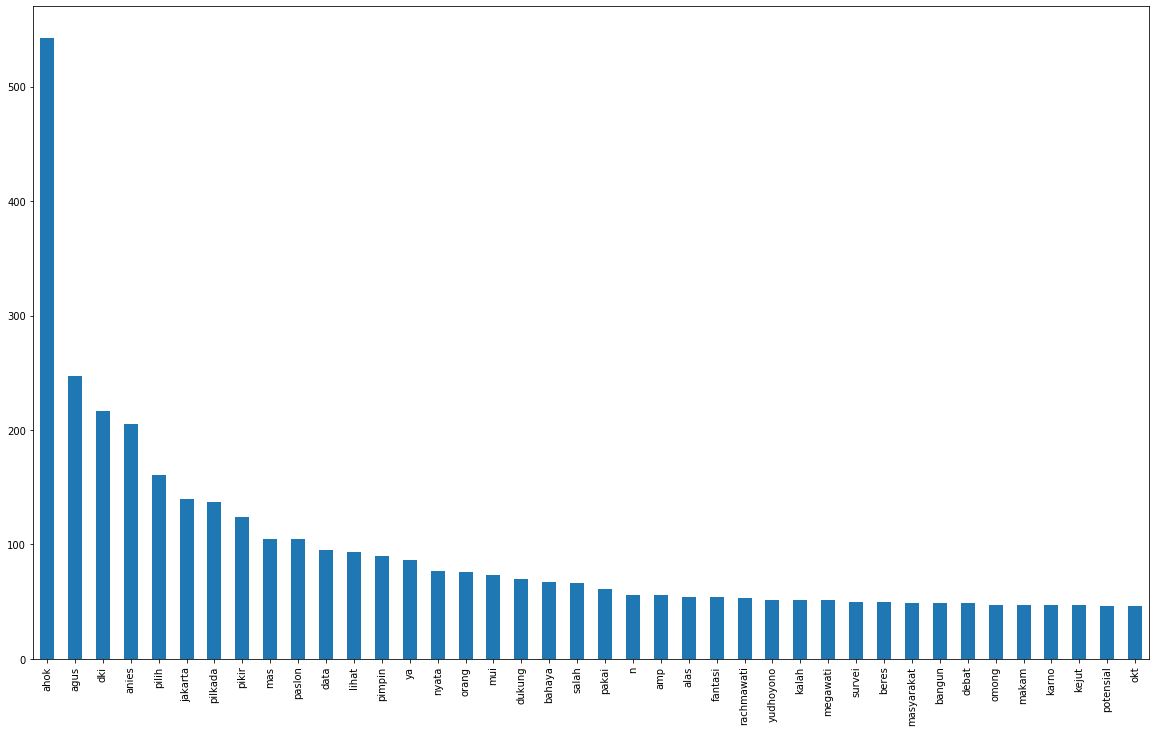

In [0]:
plt.figure(figsize = (20,12))
daftar.head(40).plot(kind = 'bar')

## 5. ML Model

In [0]:
df.head()

,Tweet,sentimen,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20,eliminate_noise_2,eliminate_noise_4,eliminate_noise_6,eliminate_noise_8,eliminate_noise_10,eliminate_noise_12,eliminate_noise_14,eliminate_noise_16,eliminate_noise_18
0,"rt @napqilla: no 1, 3 ambisinya menguasai raky...",1,"no 1, 3 ambisinya menguasai rakyat, no.2 ambi...",no ambisinya menguasai rakyat no ambisinya ...,no ambisinya menguasai rakyat no ambisinya mel...,no ambisi kuasa rakyat no ambisi layan rakyat ...,no ambisi kuasa rakyat no ambisi layan rakyat ...,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat,ambisi kuasa rakyat ambisi layan rakyat lihat
1,rt @pandji: nah gue pikir sentimen petahana ok...,1,nah gue pikir sentimen petahana oke di semal...,nah gue pikir sentimen petahana oke di semal...,nah saya pikir sentimen petahana oke di semala...,nah saya pikir sentimen tahana oke di malam ta...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...,pikir sentimen tahana oke malam mnrt politicaw...
2,rt @pandji: urutan pertama best moment #debat2...,1,urutan pertama best moment : pak basuki misa...,urutan pertama best moment pak basuki misah...,urutan pertama best moment pak basuki misahin ...,urut pertama best moment pak basuki misahin bu...,urut best moment basuki misahin bu sylvie amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp,urut best moment basuki misahin bu amp
3,rt @pandji: ini artikel yg menjelaskan ternyat...,1,ini artikel yg menjelaskan ternyata di yg da...,ini artikel yg menjelaskan ternyata di yg da...,ini artikel yang menjelaskan ternyata di yang ...,ini artikel yang jelas nyata di yang dapat res...,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed,artikel nyata respon positif socmed
4,rt @mrtampi: agus makin santai.\nahok makin sa...,0,agus makin santai.\nahok makin santun.\nanies...,agus makin santainahok makin santunnanies mak...,agus makin santainahok makin santunnanies maki...,agus makin santainahok makin santunnanies maki...,agus santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santainahok santunnanies esmosinnimhon,santai

In [0]:
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [0]:
def run_cv_binary(splits, X, Y, pipeline):
    
    kf = KFold(n_splits = splits, shuffle = True)
    res = {}
    accuracy = []
    precision_all = []
    recall_all = []
    logloss = []

    for train, test in kf.split(X, Y):
        lr_fit = pipeline.fit(X.iloc[train], Y.iloc[train])
        prediction = lr_fit.predict(X.iloc[test])
        scores = accuracy_score(Y.iloc[test], prediction)
        precision = precision_score(Y.iloc[test], prediction, average = None)
        # print(precision)
        # precision = precision_score(Y.iloc[test], prediction, average = None)
        recall = recall_score(Y.iloc[test], prediction, average = None)
        precision_all.append(np.array(precision)*100)
        recall_all.append(np.array(recall)*100)
        # print(classification_report(Y.iloc[test], prediction))

        accuracy.append(scores * 100)
        
    precision_all = np.array(precision_all)
    recall_all = np.array(recall_all)
    
    res['acc_mean'] = np.mean(accuracy)
   
    res['precision_negative_mean'] = np.mean(precision_all[:,0])

    res['precision_positive_mean'] = np.mean(precision_all[:,1])

    # res['precision_positive_mean'] = np.mean(precision_all[:,2])
    
    res['recall_negative_mean'] = np.mean(recall_all[:,0])

    res['recall_positive_mean'] = np.mean(recall_all[:,1])

    # res['recall_positive_mean'] = np.mean(recall_all[:,2])

    return res

In [0]:
def count_vectorizer_list_model(n, max_features = None, max_df= 1.0, min_df = 1):
    total = {'NB': Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),

            'NB_no_smote' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
            'NB_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             
             'NB_no_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             'LogReg': Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),

            'LogReg_no_smote' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
            'LogReg_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             
             'LogReg_no_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             'svc': Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', LinearSVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),

            'svc_no_smote' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', LinearSVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
            'svc_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', LinearSVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             
             'svc_no_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', LinearSVC()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             'XGB': Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', XGBClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),

            'XGB_no_smote' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
                        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', XGBClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
            'XGB_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
                        ('sampling_1',SMOTE()),
                        ('classifier', XGBClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
             
             'XGB_no_smote_no_tfidf' : Pipeline([
                        ('bow', CountVectorizer(ngram_range = (1,n), max_features = max_features, max_df = max_df, min_df = min_df)),  # strings to token integer counts
#                         ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
              #         ('sampling_1',SMOTE()),
                        ('classifier', XGBClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier   
                        ]),
    
            }
    return total



In [0]:
def createListModel(list_model):
    total = []
    for key,val in list_model.items():
        total.append((key, val))
    return total

In [0]:
def try_various_model(dict_model):
    res = {}
    for key, val in dict_model.items():
        res[key] = run_cv_binary(5,df['stemming'], df['sentimen'], val)
#         print (key, 'done')
    return res

# try_various_model(count_vectorizer_list_model(1))
varmodel = pd.DataFrame(try_various_model(count_vectorizer_list_model(1)))
varmodel.T

,acc_mean,precision_negative_mean,precision_positive_mean,recall_negative_mean,recall_positive_mean
NB,79.149414,82.470024,76.624365,73.745595,84.371055
NB_no_smote,79.083629,83.265133,76.161098,72.846147,85.563286
NB_smote_no_tfidf,79.482300,82.216920,77.360303,75.346203,83.684333
NB_no_smote_no_tfidf,80.079206,83.156546,77.486525,75.055480,84.813031
LogReg,79.550725,82.920248,76.861933,73.960572,85.120293
LogReg_no_smote,79.482960,82.915848,76.857851,74.091564,84.743976
LogReg_smote_no_tfidf,80.544542,82.439121,78.983425,77.403543,83.598818
LogReg_no_smote_no_tfidf,79.283844,81.015834,77.670489,76.042475,82.417529
svc,80.811863,82.906626,79.059654,77.222707,84.421385
svc_no_smote,80.213637,82.634639,78.150132,76.196515,84.207466


In [0]:
list_model = count_vectorizer_list_model(1, max_features = None, max_df= 1.0, min_df = 1)
voting_estimator = VotingClassifier(estimators=createListModel(list_model), voting='hard')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['stemming'], df['sentimen'], test_size = 0.2)

voting_estimator.fit(X_train, y_train)

print(classification_report(y_test, voting_estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       155
           1       0.79      0.90      0.84       147

    accuracy                           0.83       302
   macro avg       0.84      0.83      0.83       302
weighted avg       0.84      0.83      0.83       302



In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['eliminate_noise'], df['sentimen'], test_size = 0.2)

voting_estimator.fit(X_train, y_train)

print(classification_report(y_test, voting_estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       154
           1       0.77      0.86      0.81       148

    accuracy                           0.81       302
   macro avg       0.81      0.81      0.81       302
weighted avg       0.81      0.81      0.81       302



In [0]:
voting_estimator.predict(['wah bersih dari nurani dan busuk negatif begini'])

array([0])

In [0]:
# Check len
bow_transformer = CountVectorizer(ngram_range = (1,1)).fit(X_train)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

2158


In [0]:
def try_various_model(dict_model):
    res = {}
    for key, val in dict_model.items():
        res[key] = run_cv_binary(5,df['eliminate_noise'], df['sentimen'], val)
#         print (key, 'done')
    return res

# try_various_model(count_vectorizer_list_model(1))
varmodel = pd.DataFrame(try_various_model(count_vectorizer_list_model(1)))
varmodel.T

,acc_mean,precision_negative_mean,precision_positive_mean,recall_negative_mean,recall_positive_mean
NB,80.146751,81.342198,79.185546,78.033230,82.285452
NB_no_smote,79.616290,81.282657,78.442516,77.081635,82.260679
NB_smote_no_tfidf,80.608567,81.850883,79.547681,78.505297,82.787526
NB_no_smote_no_tfidf,80.146531,81.152491,79.207094,78.246078,82.053223
LogReg,79.815846,82.438418,77.609083,75.412323,84.104389
LogReg_no_smote,79.945436,82.972777,77.531393,75.080225,84.571865
LogReg_smote_no_tfidf,80.543002,83.411493,78.231910,76.003700,85.119850
LogReg_no_smote_no_tfidf,80.477217,84.083196,77.688720,75.143445,85.923033
svc,81.209214,82.107998,80.396845,79.602700,82.912274
svc_no_smote,80.475677,81.422524,79.494582,78.581047,82.280471


In [0]:
list_column = list(df.columns)
list_column.remove('sentimen')
list_column

['Tweet',
 'clean_link',
 'hapus_punc',
 'substitute_slang',
 'stemming',
 'eliminate_stop',
 'eliminate_noise',
 'eliminate_noise_20',
 'eliminate_noise_2',
 'eliminate_noise_4',
 'eliminate_noise_6',
 'eliminate_noise_8',
 'eliminate_noise_10',
 'eliminate_noise_12',
 'eliminate_noise_14',
 'eliminate_noise_16',
 'eliminate_noise_18']

In [0]:
list_model = count_vectorizer_list_model(1, max_features = None, max_df= 1.0, min_df = 1)
voting_estimator = VotingClassifier(estimators=createListModel(list_model), voting='hard')

def try_various_columns(list_column, pipeline):
    res = {}
    for i in list_column:
        res[i] = run_cv_binary(5,df[i], df['sentimen'], pipeline)
#         print (i, 'done')
    return res

res = try_various_columns(list_column, voting_estimator)
pd.DataFrame(res)

,Tweet,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20,eliminate_noise_2,eliminate_noise_4,eliminate_noise_6,eliminate_noise_8,eliminate_noise_10,eliminate_noise_12,eliminate_noise_14,eliminate_noise_16,eliminate_noise_18
acc_mean,81.076544,80.079426,79.812105,80.676773,81.539900,80.943434,80.410992,80.011881,80.943874,80.081846,80.610328,81.341665,81.076324,80.544102,80.810103,80.744098,80.742998
precision_negative_mean,84.296598,83.667715,82.825568,83.253312,85.233800,83.192136,83.707723,82.199578,84.449171,83.122398,82.875392,83.674919,84.741378,82.612448,83.244217,83.724919,83.587351
precision_positive_mean,78.428627,77.275065,77.300536,78.571759,78.618045,79.001476,77.886698,78.198917,78.099779,77.643718,78.665238,79.243893,78.195699,78.622476,78.721800,78.256962,78.353681
recall_negative_mean,76.079244,74.487336,74.847631,76.648100,76.218995,77.290542,75.547647,76.218307,75.594695,75.232671,77.005915,77.321641,75.618362,76.623338,76.756822,76.223001,76.248817
recall_positive_mean,86.001923,85.572149,84.725549,84.690055,86.933815,84.613198,85.158711,83.776637,86.315015,84.934669,84.277782,85.328478,86.604464,84.246097,84.813066,85.037541,85.241153


In [0]:
list_model = count_vectorizer_list_model(2, max_features = None, max_df= 1.0, min_df = 1)
voting_estimator = VotingClassifier(estimators=createListModel(list_model), voting='hard')

def try_various_columns(list_column, pipeline):
    res = {}
    for i in list_column:
        res[i] = run_cv_binary(5,df[i], df['sentimen'], pipeline)
#         print (i, 'done')
    return res

res = try_various_columns(list_column, voting_estimator)
pd.DataFrame(res)

,Tweet,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20,eliminate_noise_2,eliminate_noise_4,eliminate_noise_6,eliminate_noise_8,eliminate_noise_10,eliminate_noise_12,eliminate_noise_14,eliminate_noise_16,eliminate_noise_18
acc_mean,79.548085,79.947636,80.876988,80.146971,80.477877,81.076984,80.214297,80.478097,81.276320,79.481860,79.613870,80.942774,80.409892,80.342787,81.408770,80.876548,80.480958
precision_negative_mean,83.546488,83.513429,84.677971,83.629077,84.072208,84.334662,83.590777,82.681996,83.880232,82.189543,82.342247,83.614733,83.536454,82.557883,84.187112,83.946537,83.657175
precision_positive_mean,76.592546,77.223616,77.884045,77.384151,77.699986,78.392912,77.503813,78.628012,79.236127,77.278769,77.472204,78.598732,78.016349,78.501343,78.996368,78.457491,77.922439
recall_negative_mean,73.236524,74.552424,75.174257,74.823437,75.106026,76.132158,75.024329,77.046027,77.673361,75.001695,75.160680,76.667974,75.628802,76.802426,77.074382,76.210939,75.430550
recall_positive_mean,85.735546,85.388616,86.522837,85.494006,86.020042,86.101086,85.225062,84.072711,84.980409,84.001148,84.146343,85.249190,84.977659,83.832348,85.773285,85.398781,85.465156


In [0]:
list_model = count_vectorizer_list_model(3, max_features = None, max_df= 1.0, min_df = 1)
voting_estimator = VotingClassifier(estimators=createListModel(list_model), voting='hard')

def try_various_columns(list_column, pipeline):
    res = {}
    for i in list_column:
        res[i] = run_cv_binary(5,df[i], df['sentimen'], pipeline)
#         print (i, 'done')
    return res

res = try_various_columns(list_column, voting_estimator)
pd.DataFrame(res)

,Tweet,clean_link,hapus_punc,substitute_slang,stemming,eliminate_stop,eliminate_noise,eliminate_noise_20,eliminate_noise_2,eliminate_noise_4,eliminate_noise_6,eliminate_noise_8,eliminate_noise_10,eliminate_noise_12,eliminate_noise_14,eliminate_noise_16,eliminate_noise_18
acc_mean,79.816066,79.879211,79.348969,79.614310,79.680975,80.412312,81.473895,81.140349,79.613210,80.413852,81.407450,80.744978,80.942994,81.009439,80.279642,80.742998,81.209874
precision_negative_mean,84.098910,83.871565,83.214216,83.214603,83.563017,82.996627,85.407109,84.570944,83.478626,83.648664,84.345871,84.347847,84.065183,83.278093,83.898011,83.391996,84.146415
precision_positive_mean,76.829564,76.752394,76.529925,76.681438,76.776856,78.240615,78.406109,78.541898,76.755272,77.787898,79.001714,77.853957,78.485554,78.928710,77.489349,78.627853,78.755399
recall_negative_mean,73.314391,73.681632,73.466869,73.894423,73.778476,76.233401,75.585578,76.157439,73.839960,75.352236,77.049847,75.133336,76.245474,77.372543,74.763783,76.907200,76.819766
recall_positive_mean,86.114496,86.050842,85.269472,85.433305,85.450954,84.572483,87.095992,86.132499,85.651634,85.445727,85.656554,86.274515,85.612428,84.618531,85.791623,84.695137,85.579355


[[0.95420975 0.94682422 0.94682422 0.95864106 0.95716396 0.95125554
  0.95125554 0.94682422 0.95125554 0.95125554]
 [0.95153664 0.94326241 0.94680851 0.95271868 0.94917258 0.94444444
  0.94562648 0.94562648 0.94562648 0.94562648]
 [0.94389764 0.93700787 0.93996063 0.94389764 0.94094488 0.93799213
  0.94094488 0.94488189 0.94488189 0.94488189]
 [0.94683544 0.94177215 0.94345992 0.94683544 0.94514768 0.94177215
  0.94599156 0.94599156 0.93924051 0.93924051]
 [0.94686347 0.94169742 0.94538745 0.94686347 0.94538745 0.94317343
  0.94612546 0.94612546 0.94243542 0.94317343]]
[0.95155096 0.94704492 0.94192913 0.94362869 0.94472325]
[ 677  846 1016 1185 1355]


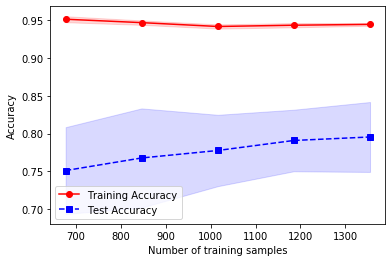

In [0]:
from sklearn.model_selection import learning_curve

list_model = count_vectorizer_list_model(2, max_features = None, max_df= 1.0, min_df = 1)
voting_estimator = VotingClassifier(estimators=createListModel(list_model), voting='hard')

train_sizes, train_scores, test_scores = learning_curve(estimator=voting_estimator,
                                                       X=df['eliminate_noise_14'],
                                                       y=df['sentimen'],
                                                       train_sizes=np.linspace(0.5, 1.0, 5),
                                                       cv=10)

print(train_scores)
# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)
print(train_mean)
print(train_sizes)
# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
voting_estimator.fit(df['eliminate_noise_14'],df['sentimen'])

VotingClassifier(estimators=[('NB',
                              Pipeline(memory=None,
                                       steps=[('bow',
                                               CountVectorizer(analyzer='word',
                                                               binary=False,
                                                               decode_error='strict',
                                                               dtype=<class 'numpy.int64'>,
                                                               encoding='utf-8',
                                                               input='content',
                                                               lowercase=True,
                                                               max_df=1.0,
                                                               max_features=None,
                                                               min_df=1,
                                                     

In [0]:
import pickle
filename = 'voting_estimator.sav';
pickle.dump(voting_estimator, open(filename, 'wb'))

In [0]:
from google.colab import files
files.download('voting_estimator.sav')